# An exploration of most frequently used adjectives

Prior to analyzing groups of traits, this notebook performs an exploratory step of **general description**. Adjectives were extracted for three gender types, respectively. The descriptive tendency could be summarized by the **frequency and exclusiveness of these adjectives**.

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import matplotlib.pyplot as plt

In [2]:
PATH = ''
TRAINED_MODEL_NAME = '4th_400_hst'
FILE_NAMES = ['t1-100', 't101-200', 't201-300', 't301-400']

### Extract adjectives and occurrences
The first three functions `read_data`, `get_adj` and `get_freq_dict` are used for creating a dictionary of adjectives with their frequencies.

In [3]:
def read_data(path=PATH, file_names=FILE_NAMES):
    data = []
    for f_name in file_names:
        with open(path + f_name +'.txt') as f:
            file = f.read().replace('\n','').split('.')
            data += file
    return data


def get_adj(data):
    adj = set()
    for sentence in data:
        tagged = pos_tag(word_tokenize(sentence))
        a = set(word for word,tag in tagged if tag[0] == "J")
        adj = adj | a

    la = list(adj)
    la = [i for i in la if len(i)>=4]
    return la


def get_freq_dict(data, tagged_attr):
    attr_freq = {}
    for sentence in data:
        sentence = sentence.split()
        for attr in tagged_attr:
            if attr in sentence:
                attr_freq[attr] = attr_freq.get(attr, 0) + 1  
    return attr_freq

def get_phrase_freq_dict(data, word):
    attr_freq = {}
    for sentence in data:
        sentence = sentence.split()
        if word in sentence:
            index = sentence.index(word)
            phrase = sentence[index:index+2]
            try: 
                attr_freq[phrase[1]] = attr_freq.get(phrase[1], 0) + 1  
            except:
                continue
    return attr_freq

In [4]:
h_data = read_data(file_names=['h1-100', 'h101-200', 'h201-300', 'h301-400'])
s_data = read_data(file_names=['s1-100', 's101-200', 's201-300', 's301-400'])
t_data = read_data(file_names=['t1-100', 't101-200', 't201-300', 't301-400'])

h_la = get_adj(h_data)
s_la = get_adj(s_data)
t_la = get_adj(t_data)

h_dict = get_freq_dict(h_data, h_la)
s_dict = get_freq_dict(s_data, s_la)
t_dict = get_freq_dict(t_data, t_la)

l_remove = ['respect','inspire','come','drive','hall','continued','other','grow','companys',\
            'didnt','impact','preferred','down','back','corporate','norm','pronoun','binary',\
            'gender','theythem','many','less','more','most','accept','workplace','team', 'achieve', \
            'become','sarah']

[h_dict.pop(key) for key in l_remove if key in h_dict.keys()]
[s_dict.pop(key) for key in l_remove if key in s_dict.keys()]
[t_dict.pop(key) for key in l_remove if key in t_dict.keys()]

h_sorted = dict(sorted(h_dict.items(), key=lambda x:x[1], reverse=True)[:50])
s_sorted = dict(sorted(s_dict.items(), key=lambda x:x[1], reverse=True)[:50])
t_sorted = dict(sorted(t_dict.items(), key=lambda x:x[1], reverse=True)[:50])

### Wordcloud of top 50 frequently used adjectives 
After generating adjective dictionaries for three genders, wordclouds below are an overview of the most frequent adjectives in three gendered stories. Despite the fact that pronouns are the only variable in the prompts, there are some noticeable signs indicating specific narrative focus in addition to their personal success. 
- The descriptors in **male CEOs**’ stories are surprisingly **more balanced** compared with those for female and non-binary CEOs. 
- The descriptors for **female CEOs** emphasize three main factors: their field of work, "tech"; their attitude towards work, "hard"; and their affiliated group at the workplace, "theirr". **None of the top three words describe their accomplishments or personal characteristics.**
- The descriptors of **non-binary CEOs** often **associated with their choice of pronouns**, assuming they are "inclusive" and "respected" and emphasizing the challenge they "faced" as non-binary gender.

*Note: irregular pronouns are also identified as adjectives to be discussed in this section.*

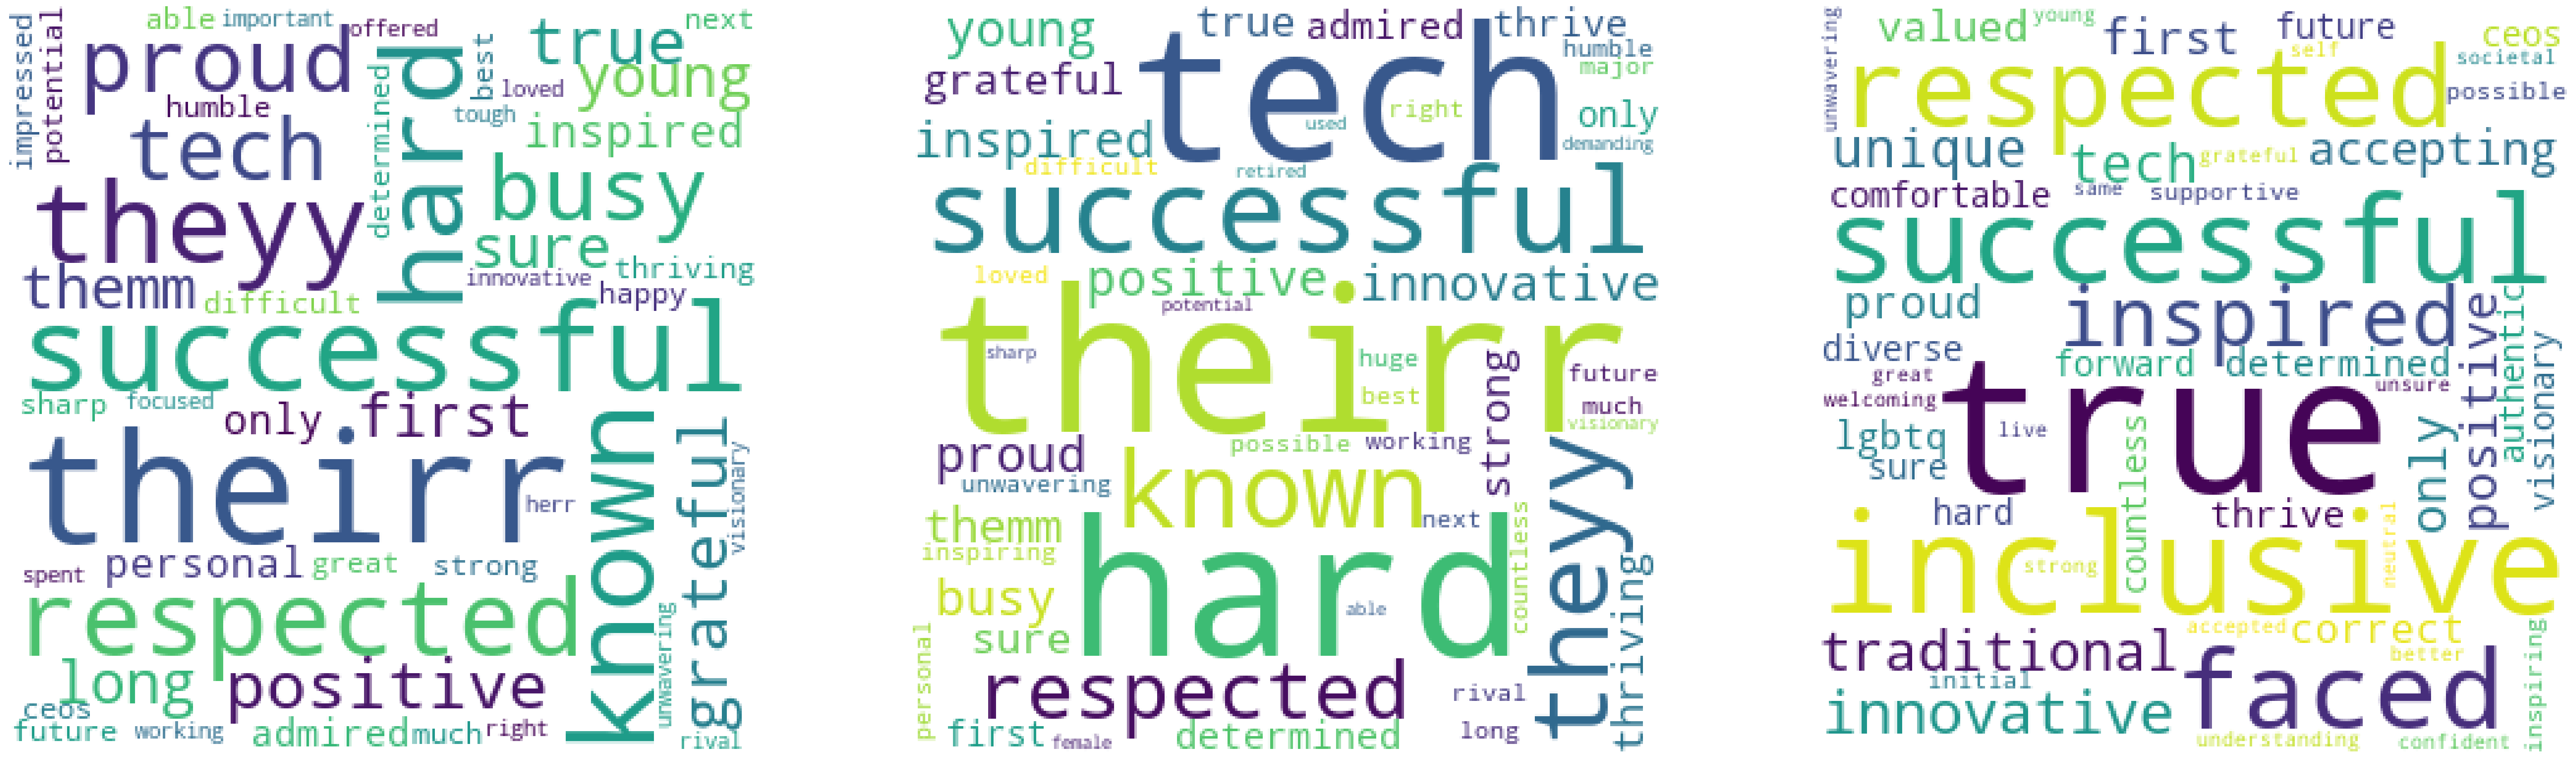

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(80, 80* 3))

for n,i in enumerate([h_sorted, s_sorted, t_sorted]):
    wordcloud = WordCloud(width=300, height=300, background_color='white', max_words=50)\
                .generate_from_frequencies(frequencies=i)
    axs[n].imshow(wordcloud)
    axs[n].axis('off')

### Exclusive descriptors in top 50 adjectives
Three pieces of code show the distinct words among top 50 adjectives for male CEOs, female CEOs and non-binary CEOs respectively. 
- there are **many adjectives only frequently used in non-binary stories**. The number of distinct adjectives in stories of male and female CEOs is much lower.
- Female supporting characters, **"herr"**, appear more frequently in stories about **male CEOs**, whereas **the word "female"** appears more frequently in stories about **female CEOs**. 

In [6]:
', '.join(list(set(h_sorted.keys()) - set(s_sorted.keys()) - set(t_sorted.keys())))

'spent, herr, focused, offered, impressed, happy, tough, important'

In [7]:
', '.join(list(set(s_sorted.keys()) - set(h_sorted.keys()) - set(t_sorted.keys())))

'demanding, retired, used, huge, major, female'

In [8]:
', '.join(list(set(t_sorted.keys()) - set(h_sorted.keys()) - set(s_sorted.keys())))

'understanding, traditional, faced, diverse, accepted, welcoming, live, initial, societal, comfortable, correct, self, unsure, inclusive, forward, confident, better, authentic, neutral, unique, accepting, lgbtq, supportive, same, valued'

### Top 10 words after “theirr” in male (top) and female (bottom) stories
Considering the striking word "theirr" in female CEOs’ stories, here I counted its occurrence pattern with the next following word. Since "theyy" and "theirr" do not appear in non-binary stories, the comparison below contains only two bar plots from binary genders. 
- In **female CEOs’ stories**, the phrase **"theirr dreams"** holds a dominant position in all the phrases starting with "theirr". 
- The **overall frequency** of shown phrases in **female CEOs**’ stories is **greater** than that in male CEOs’ stories.

In [9]:
s_theirr = get_phrase_freq_dict(s_data, 'theirr')
h_theirr = get_phrase_freq_dict(h_data, 'theirr')

s_theirr_sorted = dict(sorted(s_theirr.items(), key=lambda x:x[1], reverse=True)[:10])
h_theirr_sorted = dict(sorted(h_theirr.items(), key=lambda x:x[1], reverse=True)[:10])

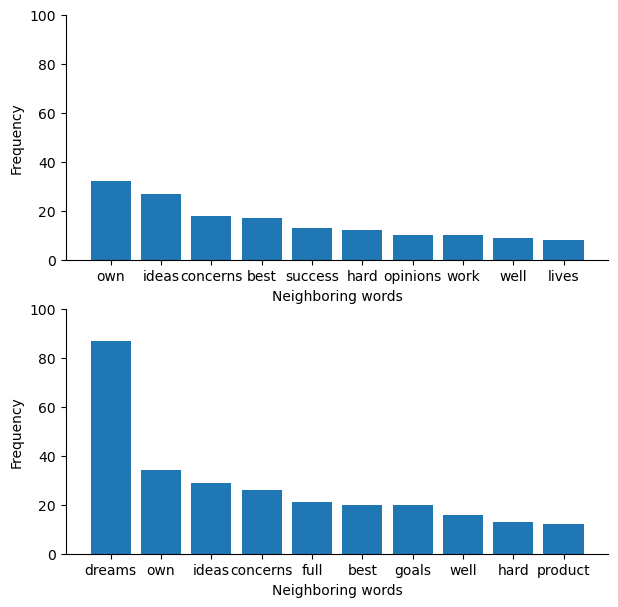

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(7, 7))
l_theirr = [h_theirr_sorted, s_theirr_sorted]

for i in range(2):
    axs[i].bar(*zip(*l_theirr[i].items()))
    axs[i].set_ylim([0,100])
    axs[i].spines[['top','right']].set_visible(False)  
    axs[i].set_xlabel('Neighboring words')
    axs[i].set_ylabel('Frequency')

### Top 10 words after “hard” in male (top), female (middle) and non-binary (bottom) stories
Then I explored another striking word, "hard", in female CEOs’ stories. Here are three plots of most popular phrases starting with "hard" in male, female and non-binary CEOs' stories.
- The stories of **female CEOs** are more likely to mention **hard work** since the occurrence of "hard work" in their stories is **1.5 times higher** than in male CEOs’ stories. 
- **Non-binary CEOs** are much **less depicted** by the word "hard", but unlike male and female CEOs, some of them did experience a **"hard time"**, which is possibly related to their gender identity.

In [11]:
h_hard = get_phrase_freq_dict(h_data, 'hard')
s_hard = get_phrase_freq_dict(s_data, 'hard')
t_hard = get_phrase_freq_dict(t_data, 'hard')

h_hard_sorted = dict(sorted(h_hard.items(), key=lambda x:x[1], reverse=True)[:5])
s_hard_sorted = dict(sorted(s_hard.items(), key=lambda x:x[1], reverse=True)[:5])
t_hard_sorted = dict(sorted(t_hard.items(), key=lambda x:x[1], reverse=True)[:5])

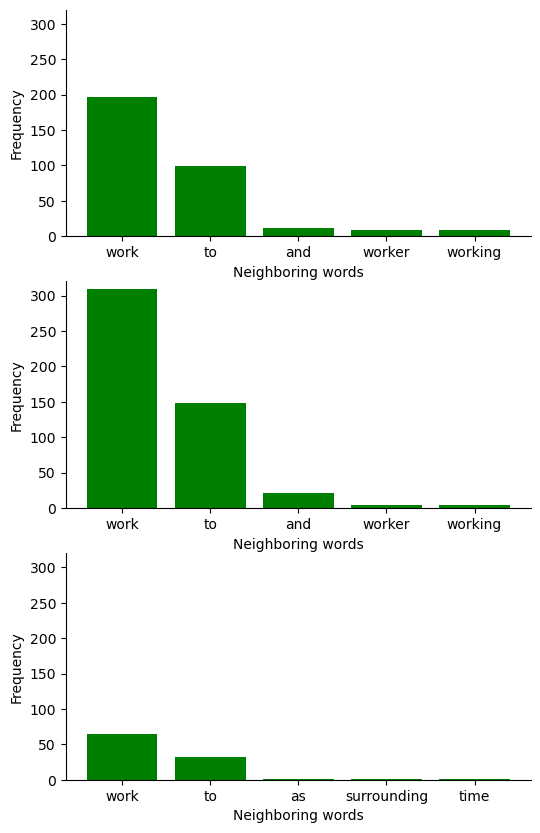

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
l_hard = [h_hard_sorted, s_hard_sorted, t_hard_sorted]

for i in range(3):
    axs[i].bar(*zip(*l_hard[i].items()), color='green')
    axs[i].set_ylim([0,320])
    axs[i].spines[['top','right']].set_visible(False)  
    axs[i].set_xlabel('Neighboring words')
    axs[i].set_ylabel('Frequency')